<a href="https://colab.research.google.com/github/jihankaruniaa/PCVK_Ganjil_2024/blob/main/Modul_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 10 - Thresholding, Segmentasi Sederhana

**Penggunaan dari library OpenCV cv.Threshold**

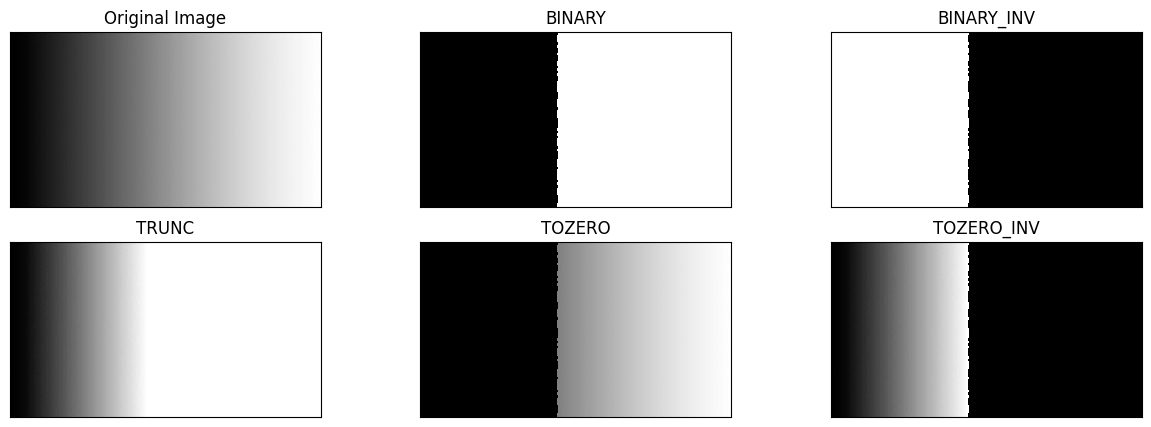

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/gradient.jpg')
img = cv.imread(filename, 0)  # Read image in grayscale

thresh = 127  # Nilai Threshold yang ditentukan
# 1. thresh1 jika pixel di img > 127, maka thresh1 bernilai 1 (putih) selain itu bernilai 0 (hitam)
ret, thresh1 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)
# 2. thresh2 adalah binary threshold inverse
ret, thresh2 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY_INV)
# 3. Threshold Truncate
ret, thresh3 = cv.threshold(img, thresh, 255, cv.THRESH_TRUNC)
# 4. Threshold Tozero
ret, thresh4 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO)
# 5. Threshold Tozero Inverse
ret, thresh5 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

**Adaptive Threshold**

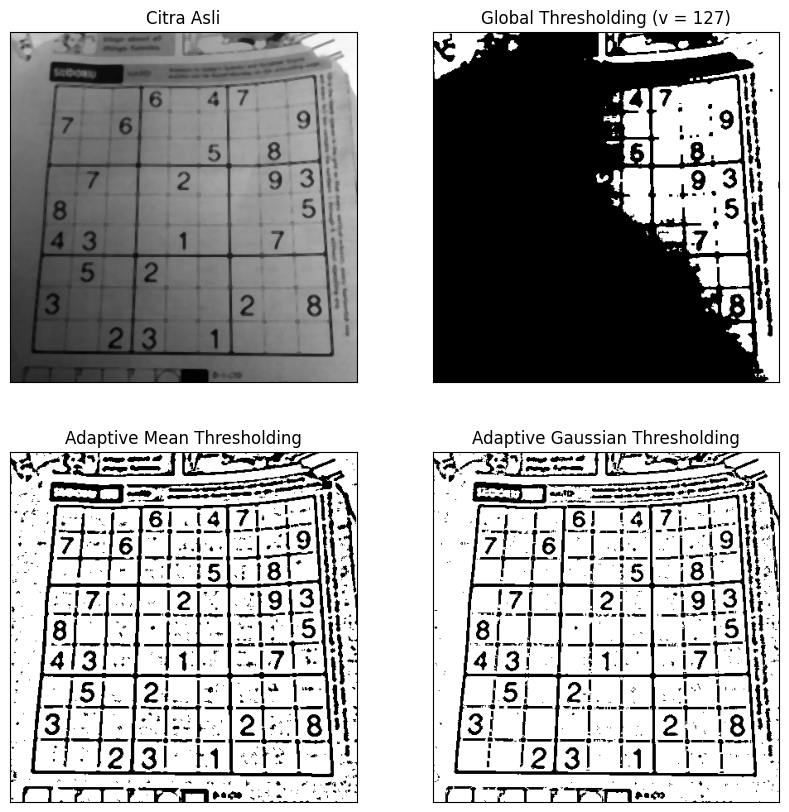

In [ ]:
filename = ('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename), 5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)

thresh = 127
ret, th1 = cv.threshold(gray, thresh, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

titles = ['Citra Asli', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]

plt.figure(figsize=(10, 10))
for i in range(len(citra2)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(citra2[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

**Penggunaan Otsu’s dengan library OpenCV**

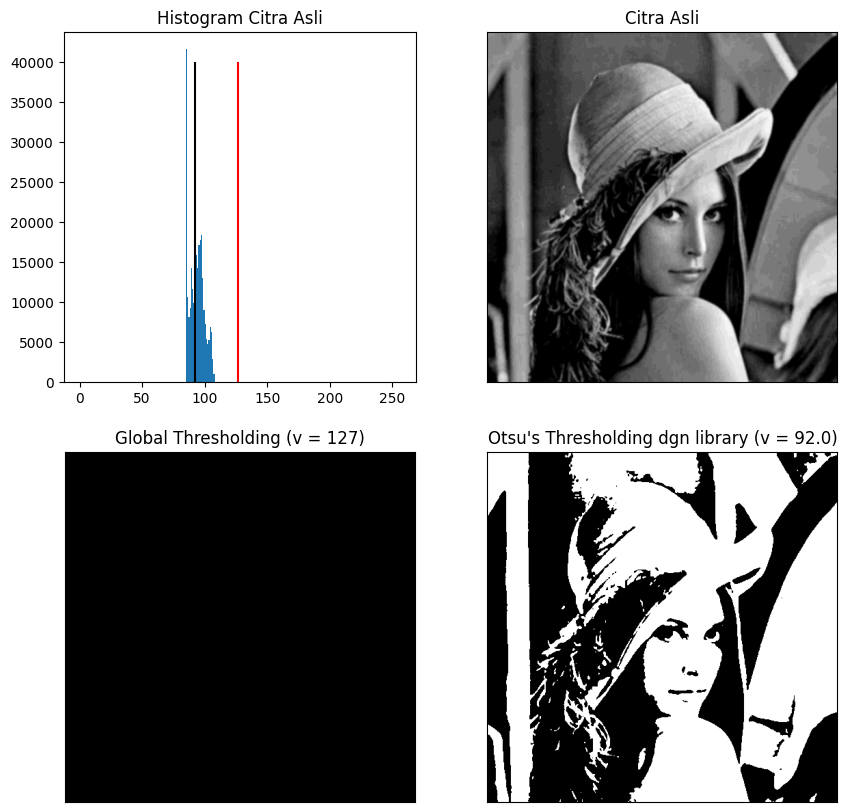

In [ ]:
filename = ('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/lena_gs_lc2.jpg')
img = cv.imread(filename, 0)
blur = cv.GaussianBlur(img, (5, 5), 0)

thresh = 127
ret, th1 = cv.threshold(blur, thresh, 255, cv.THRESH_BINARY)
ret2, th2 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

x = "Otsu's Thresholding dgn library (v = " + str(ret2) + ")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize=(10, 10))

# Plot histogram
plt.subplot(2, 2, 1)
plt.hist(blur.ravel(), 256, [0, 256])
plt.vlines(ret, 0, 40000, colors='red')  # garis vertikal merah menunjukkan threshold global 127
plt.vlines(ret2, 0, 40000, colors='black')  # garis vertikal hitam menunjukkan threshold 92 hasil Otsu's
plt.title('Histogram Citra Asli')

# Display images
for i in range(len(citra3)):
    plt.subplot(2, 2, i + 2)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

**Menampilkan hasil dari threshold Otsu’s tanpa Gaussian Filter dan dengan menggunakan Gaussian Filter**

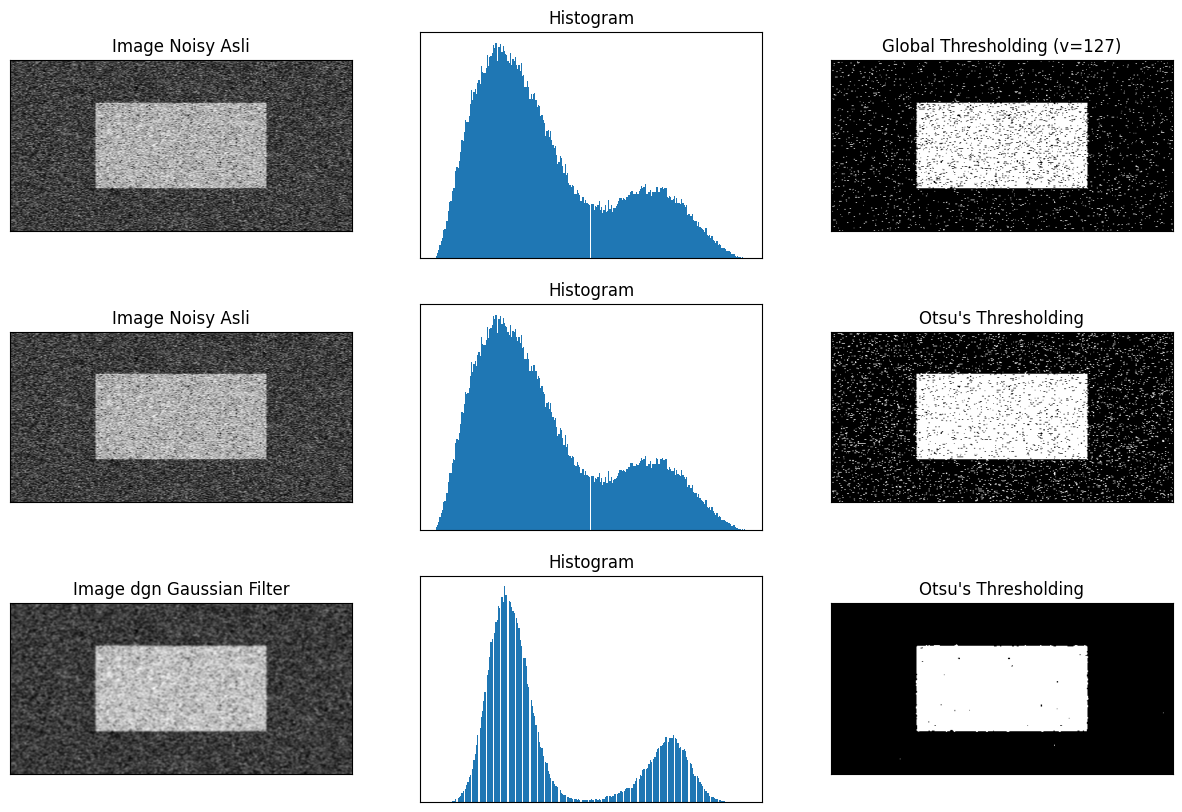

In [ ]:
filename = ('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/noisy2.png')
img = cv.imread(filename, 0)

# Global Thresholding
ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Otsu's Thresholding
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Otsu's Thresholding after Gaussian filtering
blur = cv.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Plotting all images
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]

titles = ['Image Noisy Asli', 'Histogram', 'Global Thresholding (v=127)',
          'Image Noisy Asli', 'Histogram', "Otsu's Thresholding",
          'Image dgn Gaussian Filter', 'Histogram', "Otsu's Thresholding"]

plt.figure(figsize=(15, 10))

for i in range(3):
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3])
    plt.xticks([]), plt.yticks([])

    plt.subplot(3, 3, i * 3 + 2)
    plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i * 3 + 1])
    plt.xticks([]), plt.yticks([])

    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2])
    plt.xticks([]), plt.yticks([])

plt.show()

**Penggunaan K-Means pada segmentasi citra**

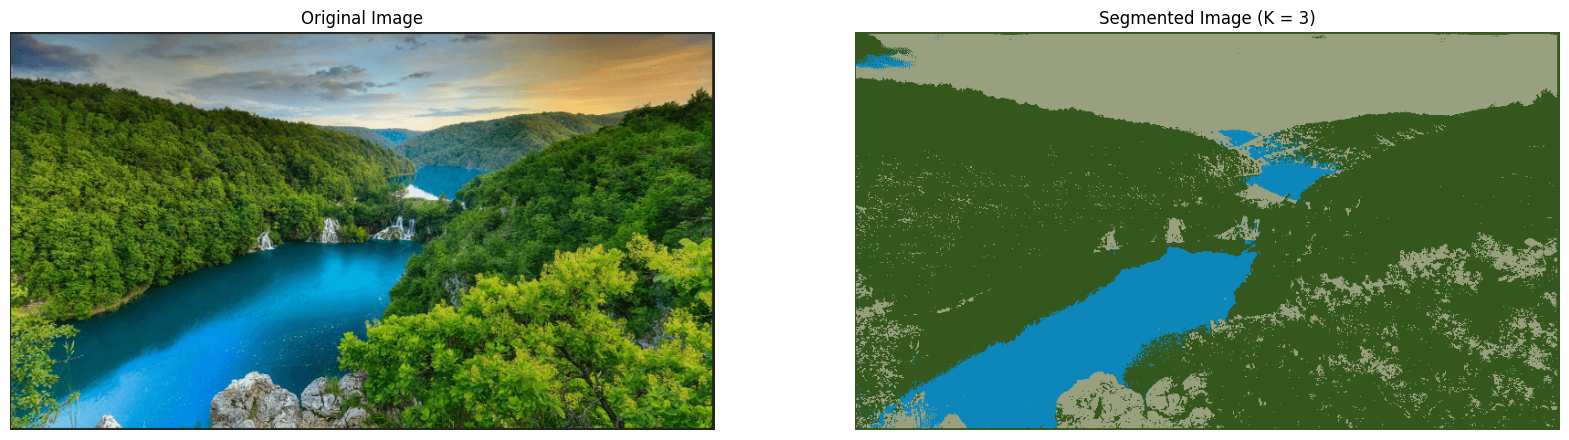

In [ ]:
filename = ('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/jungle.png')
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Reshape the array to a 2D array of pixels
pixel_values = img.reshape((-1, 3))
# Convert to float
pixel_values = np.float32(pixel_values)

# Define criteria to stop the algorithm iteration
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Number of clusters (K)
k = 3
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert the centers to uint8 (so they can be displayed as colors)
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Map each pixel to the color of the centroid it belongs to
segmented_image = centers[labels]

# Reshape the image to the original image shape
segmented_image = segmented_image.reshape(img.shape)

# Plot the original and segmented image
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1), plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2), plt.imshow(segmented_image)
plt.title("Segmented Image (K = 3)")
plt.axis('off')

plt.show()

**Mengubah warna pada cluster tertentu**

(<Axes: >, <matplotlib.image.AxesImage at 0x7c715634fbe0>)

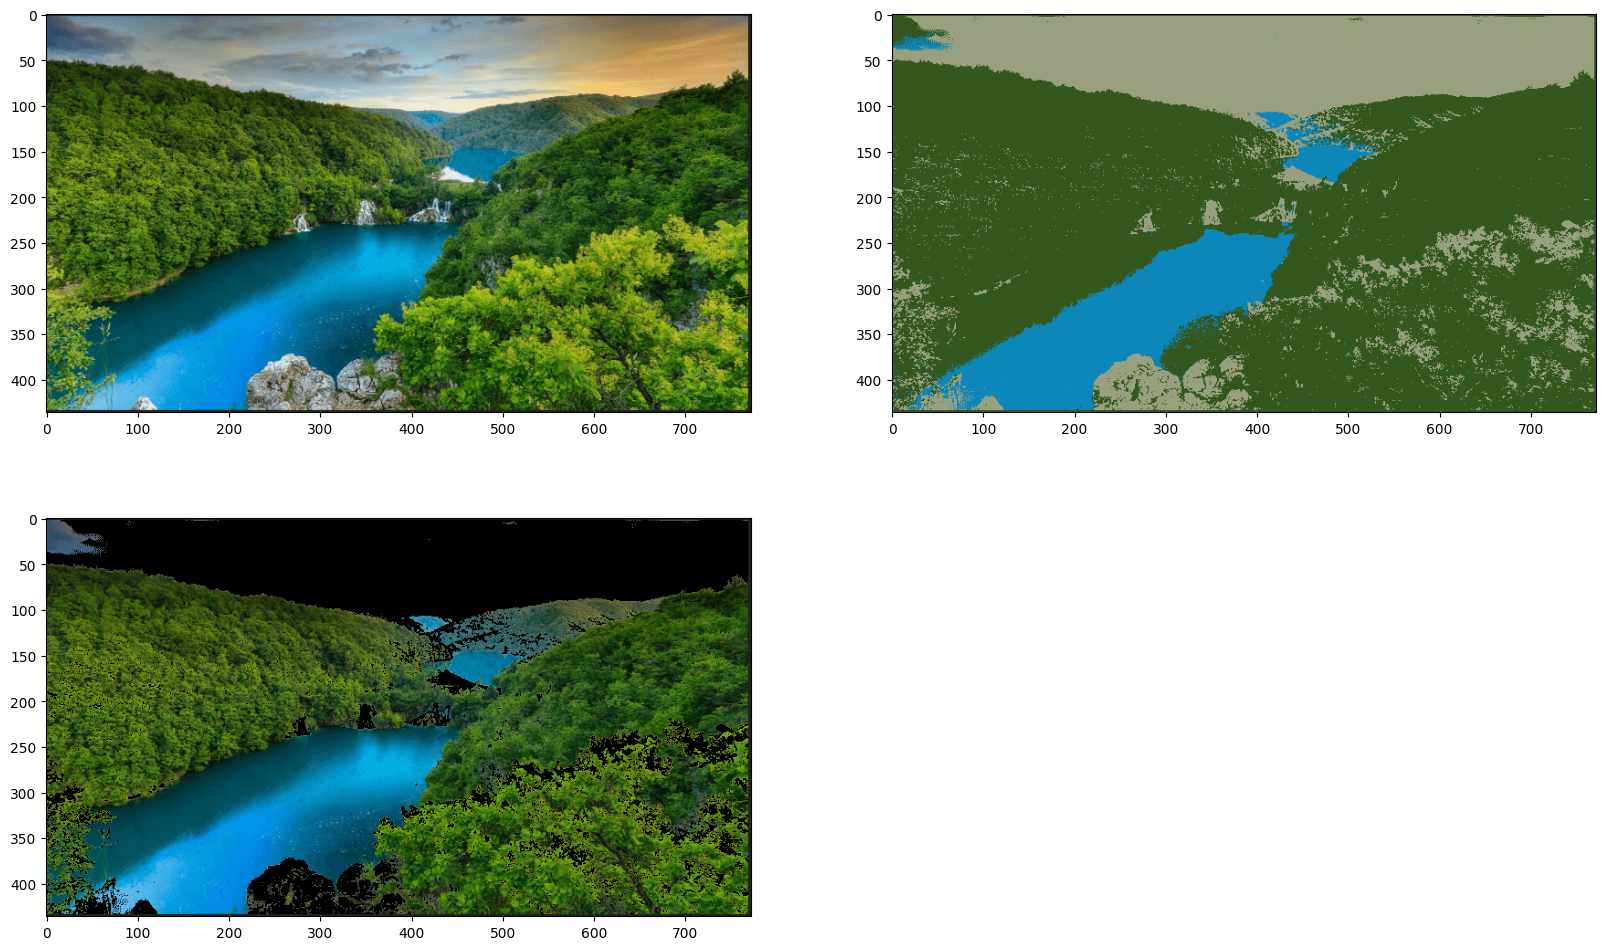

In [ ]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

## Tugas Praktikum

#### 1. Import folder drive

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 2. Import library

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

#### 3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual

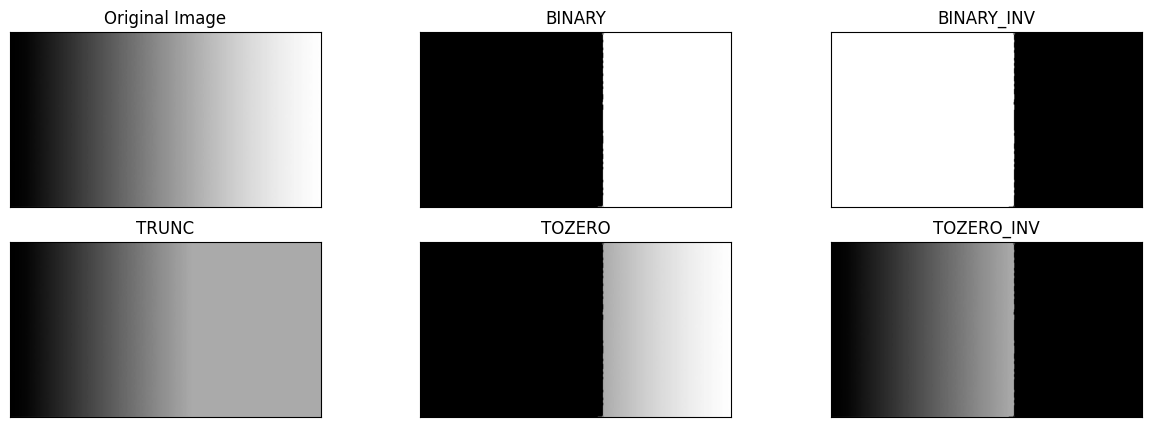

In [ ]:
img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/gradient.jpg')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

thresh = 170
# 1. Binary Threshold
ret, thresh1 = cv.threshold(gray_img, thresh, 255, cv.THRESH_BINARY)
# 2. Binary Threshold Inverse
ret, thresh2 = cv.threshold(gray_img, thresh, 255, cv.THRESH_BINARY_INV)
# 3. Truncate Threshold
ret,thresh3 = cv.threshold(gray_img, thresh, 255, cv.THRESH_TRUNC)
# 4. Tozero Threshold
ret, thresh4 = cv.threshold(gray_img, thresh, 255, cv.THRESH_TOZERO)
# 5. Tozero Inverse Threshold
ret, thresh5 = cv.threshold(gray_img, thresh, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gray_img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

#### 4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu's . (gunakan image balloon.jpg agar terlihat beda antara hasil otsu's dengan global threshold biasa).

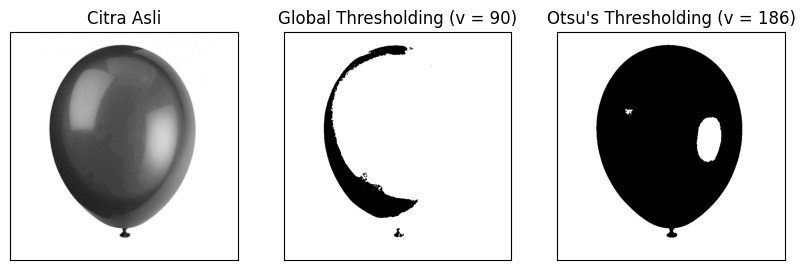

In [ ]:
# Load gambar balloon
img = ('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/balloon.jpg')
citra = cv.medianBlur(cv.imread(img), 5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)

# Global Thresholding
thresh = 90
ret, th1 = cv.threshold(gray, thresh, 255, cv.THRESH_BINARY)

# Manual Otsu's Thresholding (with a predefined threshold of 186)
otsu_threshold = 186

# Apply the Otsu's threshold
ret, th_otsu = cv.threshold(gray, otsu_threshold, 255, cv.THRESH_BINARY)

# Displaying results
titles = ['Citra Asli', f'Global Thresholding (v = {thresh})', f'Otsu\'s Thresholding (v = {otsu_threshold})']
citra2 = [gray, th1, th_otsu]

plt.figure(figsize=(10, 10))
for i in range(len(citra2)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra2[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

#### 5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.

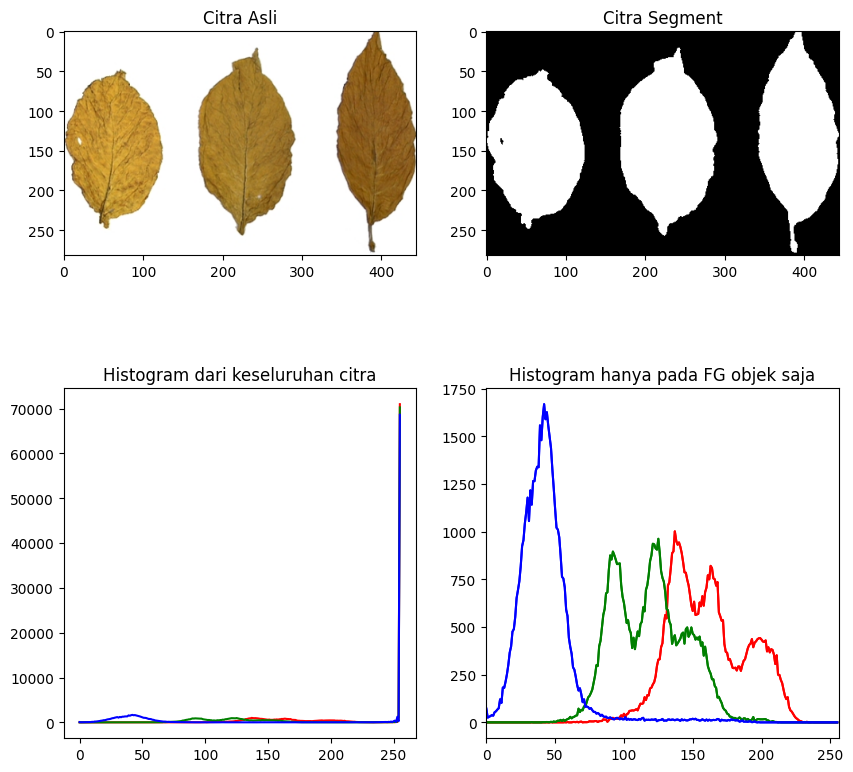

In [ ]:
img = ('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/tobacco.jpg')
img_l = cv.imread(img)
img_rgb = cv.cvtColor(img_l,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

#### 6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)


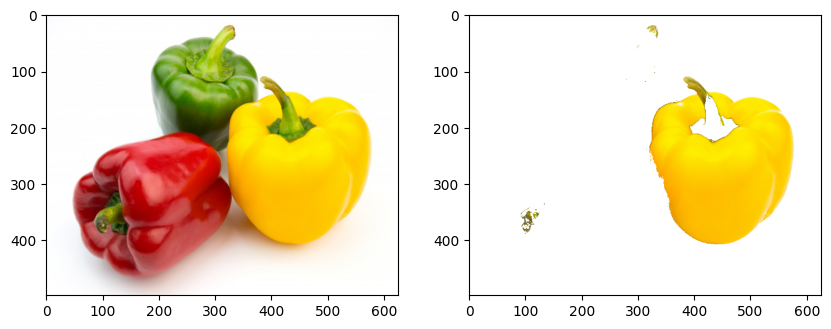

In [79]:
from sklearn.cluster import KMeans

# Load the image
image_path = '/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/peppers.jpg'
image = cv.imread(image_path)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Convert the image to HSV
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)

# Reshape the image to be a list of pixels
pixels = image_hsv.reshape((-1, 3))

# Use KMeans to segment the image into clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(pixels)

# Get the cluster centers (the representative colors)
cluster_centers = kmeans.cluster_centers_

# Assign each pixel to the nearest cluster
segmented_image = kmeans.labels_.reshape(image_hsv.shape[:2])

# Define the HSV range for yellow color
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Create a mask for yellow color
mask = cv.inRange(image_hsv, lower_yellow, upper_yellow)

# Create an output image with a white background
output_image = np.copy(image_rgb)
output_image[np.where(mask == 0)] = [255, 255, 255]  # Set background to white

# Apply the mask to get only yellow color (with white background)
yellow_image = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

# Plot the original and yellow-segmented image with white background
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)

plt.subplot(1, 2, 2)
plt.imshow(output_image)

plt.show()

#### 7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul in

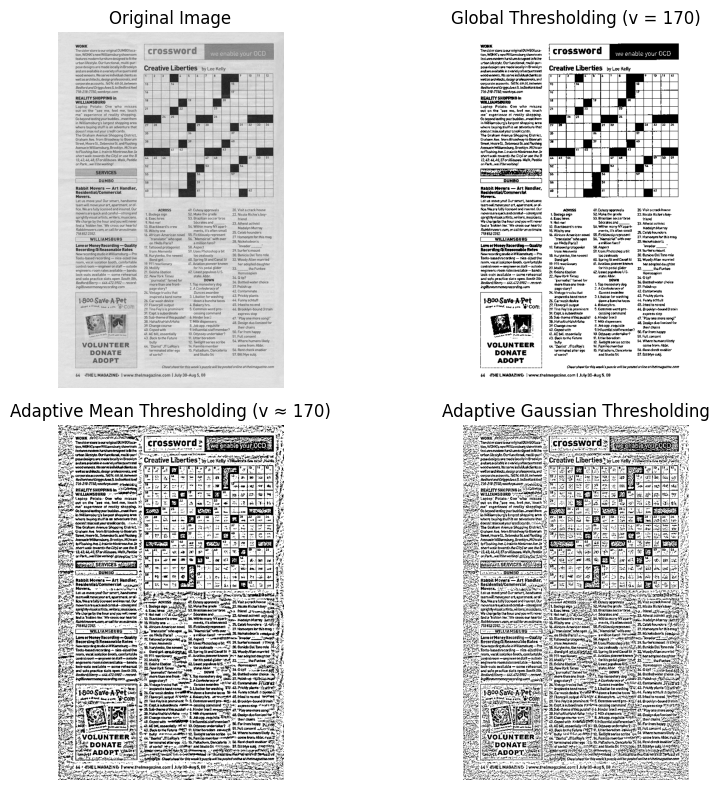

In [ ]:
# Load image
image = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/crossword.jpg', cv.IMREAD_GRAYSCALE)

# Apply global thresholding with threshold value 170
_, binary_global = cv.threshold(image, 170, 255, cv.THRESH_BINARY)

# Apply adaptive mean thresholding with the same 'v=170' concept
adaptive_mean = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

# Apply adaptive Gaussian thresholding
adaptive_gaussian = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

# Titles and images for display
titles = ['Original Image', 'Global Thresholding (v = 170)', 'Adaptive Mean Thresholding (v ≈ 170)', 'Adaptive Gaussian Thresholding']
images = [image, binary_global, adaptive_mean, adaptive_gaussian]

# Plot images
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()